In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

#pré processamento e Divisão
from sklearn.model_selection import train_test_split, GridSearchCV

#Modelo
from xgboost import XGBClassifier

#Métricas de avaliação
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
warnings.filterwarnings('ignore', category=FutureWarning)
print('Bibliotecas importadas com sucesso!')

Bibliotecas importadas com sucesso!


In [ ]:
#ETAPA 02 - Carregamento e preparação dos dados

# - Carregamento do arquivo CSV
# - Realizar o pre processamento
# - Dividir os dados em teste e treino

try:
  df = pd.read_csv('/content/flights_delays_120.csv', sep=',')
  print("O arquivo foi carregado com sucesso!")
  print("\nAmostra dos dados")
except FileNotFoundError:
  print("O arquivo não foi encontrado no diretório!")
  print("Por gentileza, verifique o diretório")
  df = None

if df is not None:
  #Análise inicial
  print("\n Informações sobre o dataframe")
  print(df.head())
  df.info()

  print("\nBalanceamento da variavel-alvo 'delayed' : ")
  print(df['delayed'].value_counts(normalize=True))

  #Iniciar o pré processamento

  #1. Identificar X (Features) e Y (variável alvo)
  target_column = 'delayed'

  #2. Identificar colunas categóricas e numéricas:
  categorical_features = ['airline', 'origin', 'destination', 'wheather']
  print(f"Variaveis categóricas: {categorical_features}" )

  #3. Aplicação do one-hot encoding (pd.get_dummies)
  # 'airline', 'origin' -> Serão transformadas para colunas numéricas com get_dummies
  df_processed = pd.get_dummies(df, categorical_features, drop_first=True)
  print("\nAmostra de dados processados")
  print(df_processed.head())

  #4. Definição de X e y
  X = df_processed.drop(target_column, axis=1)
  y = df_processed[target_column]

  # ---- Divisão dos dados ----
  X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size = 0.3,
      random_state= 42,
      stratify=y
  )

  print(f'\nDados divididos: ')
  print(f"Conjunto de treino (X_train): {X_train.shape}")
  print(f"Conjunto de Teste (X_test): {X_test.shape}")

O arquivo foi carregado com sucesso!

Amostra dos dados

 Informações sobre o dataframe
     airline origin destination  departure_hour  day_of_week weather  delayed
0  TravelAir    GIG         FOR              11            5   Storm        0
1   JetCloud    CNF         SSA              11            3    Wind        0
2   SkyWings    POA         SSA               4            5     Fog        1
3   JetCloud    BSB         FOR               6            4   Storm        1
4   JetCloud    GRU         FOR               3            1    Rain        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         120 non-null    object
 1   origin          120 non-null    object
 2   destination     120 non-null    object
 3   departure_hour  120 non-null    int64 
 4   day_of_week     120 non-null    int64 
 5   weather         120 non-nul

In [ ]:
# Etapa03 - Treinamento do modelo

if df is not None:
  print("----- Treinando o modelo XGBoost -----")

  xgb_baseline = XGBClassifier(
      random_state=42,
      use_label_encoder = False,
      eval_metric = 'logloss'
  )

  #treinar o modelo
  xgb_baseline.fit(X_train, y_train)

  print("Modelo treinado com sucesso!")

----- Treinando o modelo XGBoost -----
Modelo treinado com sucesso!


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:32:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----- Avaliação do modelo -----

Métricas (Baseline):
Acurácia:   0.9167
Precisão:   0.8824
Recall:     0.9375
F1-Score:   0.9091

Relatório de classificação
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.94      0.91        16

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Matriz de confusão... 


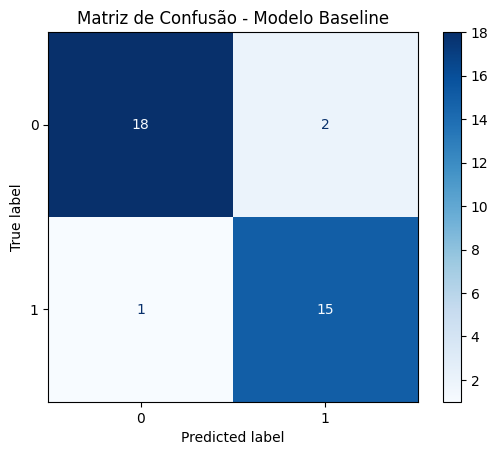

In [ ]:
##Avaliação do modelo
if df is not None:
  print("----- Avaliação do modelo -----")

   # Fazer previsões no conjunto de teste
  y_pred_baseline = xgb_baseline.predict(X_test)

  #Calculo das métricas
  accuracy_base = accuracy_score(y_test, y_pred_baseline)
  precision_base = precision_score(y_test, y_pred_baseline)
  recall_base = recall_score(y_test, y_pred_baseline)
  f1_base = f1_score(y_test, y_pred_baseline)

  #Exibição das métricas
  print("\nMétricas (Baseline):")
  print(f"Acurácia:   {accuracy_base:.4f}")
  print(f"Precisão:   {precision_base:.4f}")
  print(f"Recall:     {recall_base:.4f}")
  print(f"F1-Score:   {f1_base:.4f}")

  #Relatório de classificação
  print("\nRelatório de classificação")
  print(classification_report(y_test, y_pred_baseline))

  print("Matriz de confusão... ")
  cm_base = confusion_matrix(y_test, y_pred_baseline)
  disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base)

  disp_base.plot(cmap=plt.cm.Blues)
  plt.title("Matriz de Confusão - Modelo Baseline")
  plt.show()